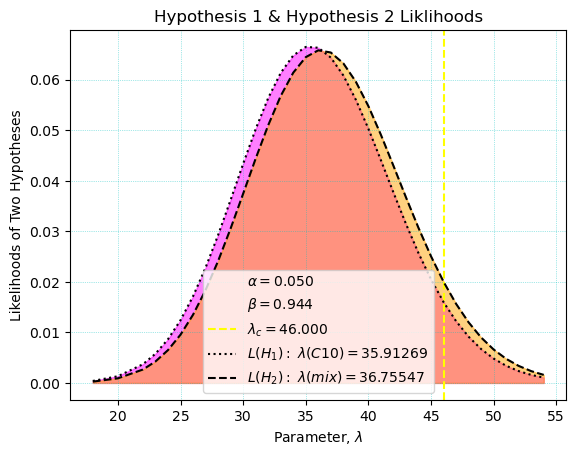

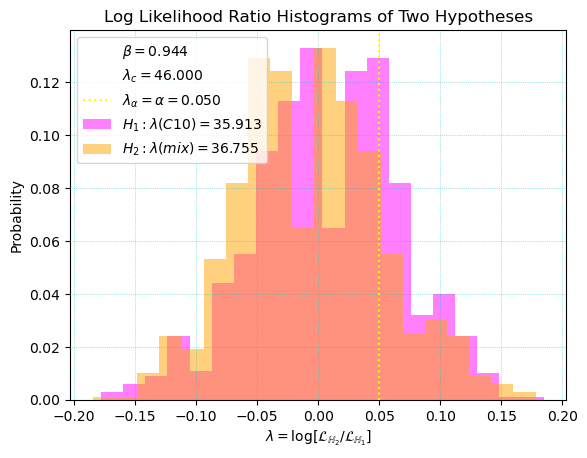

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math

N0 = 1000

t_half1 = 19.3009
t_half2 = 17.274 # half life of Ne-17 nuclei

rate1 = np.log(2)/t_half1
rate2 = np.log(2)/t_half2
lambda1 = 1000.0*rate1
lambda2 = 1000.0*(0.8*rate1 + 0.2*rate2)

dist1 = random.poisson(lambda1, N0)
np.savetxt("decay_dist1.txt", dist1, fmt = '%u')
dist2 = random.poisson(lambda2, N0)
np.savetxt("decay_dist2.txt", dist2, fmt = '%u')


file1 = open("decay_dist1.txt", "r")
hypothesis1 = []
for i in file1:
    hypothesis1.append(int(i))
hypothesis1.sort()
#hypothesis1 = np.array(hypothesis1)


file2 = open("decay_dist2.txt", "r")
hypothesis2 = []
for j in file2:
    hypothesis2.append(int(j))  
hypothesis2.sort()      
hypothesis2 = np.array(hypothesis2)



alpha = 0.05
critical_value = hypothesis1[min(int((1 - alpha)*len(hypothesis1)), len(hypothesis1)-1)]
remaining = np.where( hypothesis2 > critical_value)[0][0]
beta = remaining/len(hypothesis2)


k = 0
Liklihood1, Liklihood2 = 0, 0
H1_Liklihood = []
H2_Liklihood = []
H1_LLR = []
H2_LLR = []

for k in range(0, len(hypothesis1)):

    Liklihood1 = (np.exp( - lambda1))*(lambda1**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    H1_Liklihood.append(Liklihood1)
    Liklihood2 = (np.exp( - lambda2))*(lambda2**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    H2_Liklihood.append(Liklihood2)
    
    H1_LLR.append(np.log10(Liklihood1/Liklihood2))
    H2_LLR.append(np.log10(Liklihood2/Liklihood1))

hypothesis1.sort()
w1 = np.ones_like(H1_LLR)/len(H1_LLR)
w2 = np.ones_like(H2_LLR)/len(H2_LLR)



##################################
# Likelihoods of Two Hypotheses  #
##################################

fig, ax = plt.subplots()
plt.plot([], [], ' ', label = r'$\alpha = {:.3f}$'.format(alpha))
plt.plot([], [], ' ', label = r'$\beta = {:.3f}$'.format(beta))
plt.axvline(critical_value, linestyle = 'dashed', color = 'yellow', label = r'$\lambda_{c} = $' + '${:.3f}$'.format(critical_value))
ax.plot(hypothesis1, H1_Liklihood, label = r'$L(H_1):$ $\lambda(C10) = {:.5f}$'.format(lambda1), color = 'black', linestyle = 'dotted')
ax.plot(hypothesis1, H2_Liklihood, label = r'$L(H_2):$ $\lambda(mix) = {:.5f}$'.format(lambda2), color = 'black', linestyle = 'dashed')
ax.fill_between(hypothesis1, 0, H1_Liklihood, alpha = 0.5, color = 'magenta')
ax.fill_between(hypothesis1, 0, H2_Liklihood, alpha = 0.5, color = 'orange')
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dotted', linewidth = 0.5)
plt.title("Hypothesis 1 & Hypothesis 2 Liklihoods")
plt.xlabel(r"Parameter, $\lambda$")
plt.ylabel("Likelihoods of Two Hypotheses")
plt.legend(loc = 0)
plt.savefig('Decay_Likelihoods.pdf')
plt.show()

###########################################
# Log Likelihood Ratio of Two Hypotheses  #
###########################################

plt.plot([], [], ' ', label = r'$\beta = {:.3f}$'.format(beta))
plt.plot([], [], ' ', label = r'$\lambda_c = {:.3f}$'.format(critical_value))
plt.axvline(alpha, linestyle = 'dotted', color = 'yellow', label = r'$\lambda_\alpha = \alpha = {:.3f}$'.format(alpha))
plt.hist(H1_LLR, bins = 20, weights = w1, color = 'magenta', alpha = 0.5, label = r"$H_1 : \lambda(C10) = {:.3f}$".format(lambda1))
plt.hist(H2_LLR, bins = 20, weights = w2, color = 'orange', alpha= 0.5, label = r'$H_2 : \lambda(mix) = {:.3f}$'.format(lambda2))
plt.title('Log Likelihood Ratio Histograms of Two Hypotheses')
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dotted', linewidth = 0.5)
plt.xlabel(r'$\lambda = \log [{{\cal L}_{\mathbb{H}_{2}}}/{{\cal L}_{\mathbb{H}_{1}}} ] $')
plt.ylabel('Probability')
plt.legend(loc = 0)
plt.savefig('Decay_LLR.pdf')
plt.show()